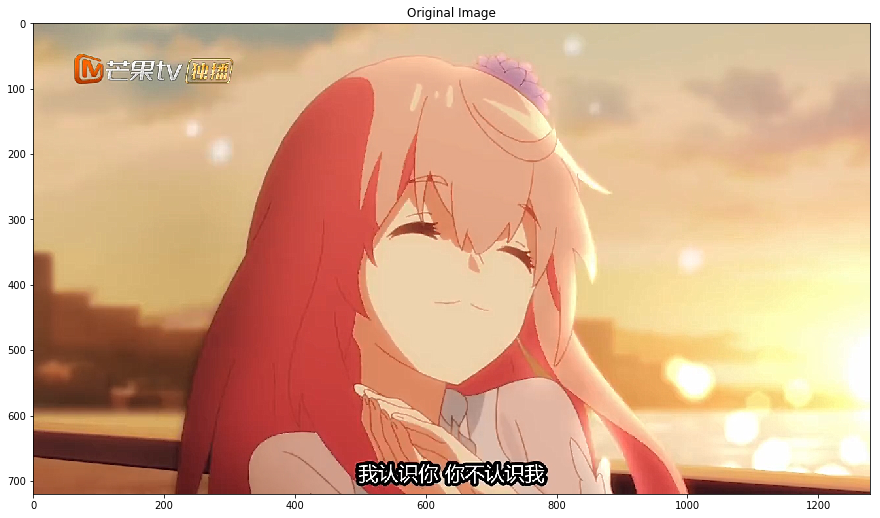

In [12]:
#เตรียมการ library
%matplotlib inline
from skimage import data, draw
from skimage import transform, util
from skimage.io import imread
import numpy as np
from skimage import filters, color
from matplotlib import pyplot as plt
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 15, 30

hl_color = np.array([0, 1, 0])

img = imread("../images/testsubtitle_1.jpg")#data.rocket()
img = util.img_as_float(img)
eimg = filters.sobel(color.rgb2gray(img))

plt.title('Original Image')
plt.imshow(img)

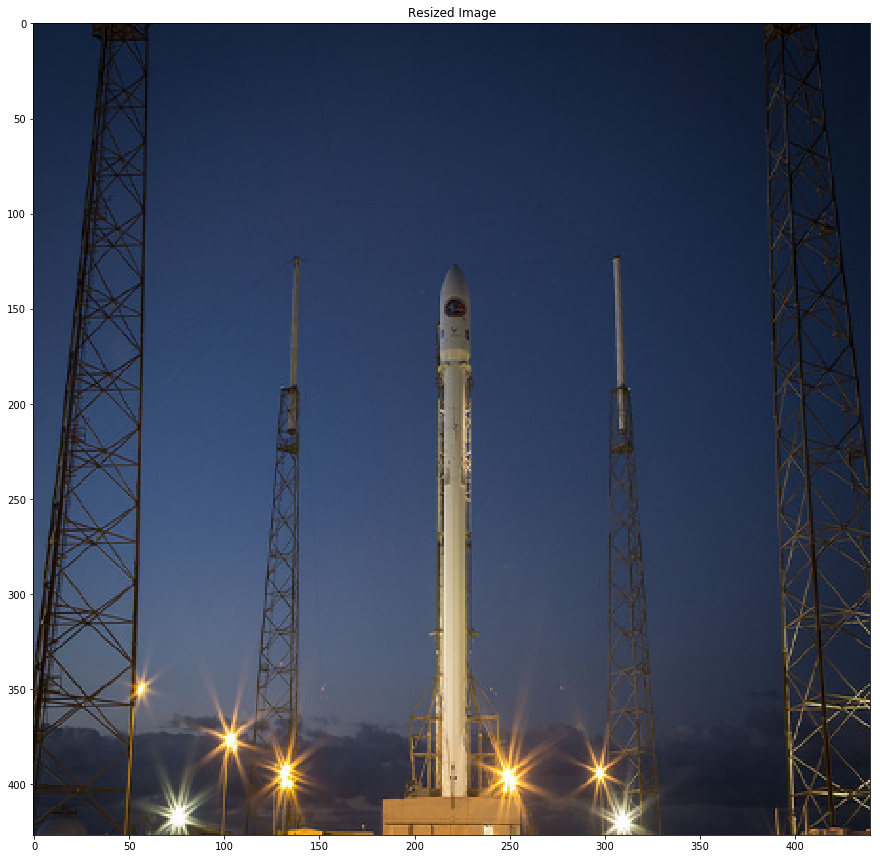

In [3]:
resized = transform.resize(img, (img.shape[0], img.shape[1] - 200),
                           mode='reflect')
plt.figure()
plt.title('Resized Image')
plt.imshow(resized)

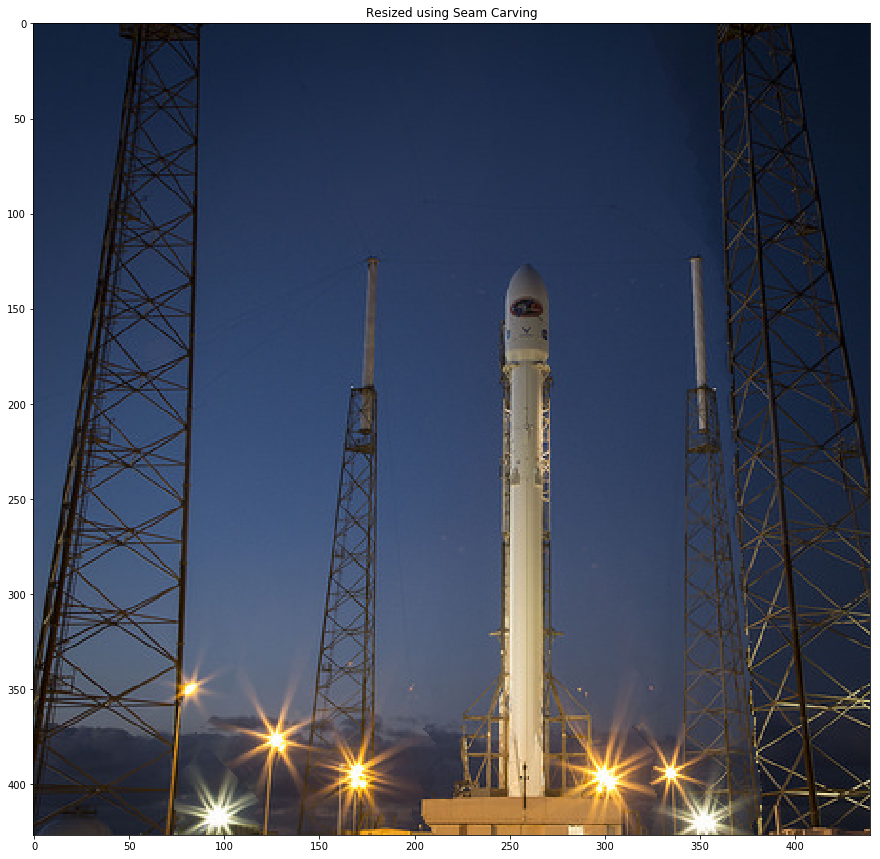

In [4]:
out = transform.seam_carve(img, eimg, 'vertical', 200)
plt.figure()
plt.title('Resized using Seam Carving')
plt.imshow(out)

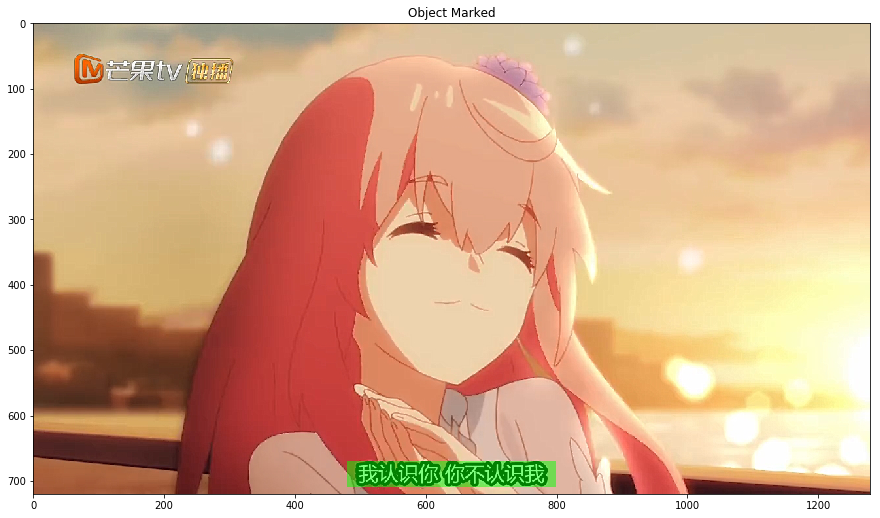

In [14]:
masked_img = img.copy()

poly = [(670,480),(710,480),(710,800),(670,800)]
pr = np.array([p[0] for p in poly])
pc = np.array([p[1] for p in poly])
rr, cc = draw.polygon(pr, pc)

masked_img[rr, cc, :] = masked_img[rr, cc, :]*0.5 + hl_color*.5
plt.figure()
plt.title('Object Marked')

plt.imshow(masked_img)

In [12]:
rr[:100]

array([121, 122, 122, 122, 123, 123, 123, 123, 124, 124, 124, 124, 124,
       125, 125, 125, 125, 125, 125, 126, 126, 126, 126, 126, 126, 126,
       126, 127, 127, 127, 127, 127, 127, 127, 127, 127, 127, 128, 128,
       128, 128, 128, 128, 128, 128, 128, 128, 129, 129, 129, 129, 129,
       129, 129, 129, 129, 129, 129, 129, 130, 130, 130, 130, 130, 130,
       130, 130, 130, 130, 130, 130, 130, 131, 131, 131, 131, 131, 131,
       131, 131, 131, 131, 131, 131, 131, 131, 132, 132, 132, 132, 132,
       132, 132, 132, 132, 132, 132, 132, 132, 132], dtype=int64)

In [13]:
cc[:100]

array([322, 321, 322, 323, 320, 321, 322, 323, 320, 321, 322, 323, 324,
       319, 320, 321, 322, 323, 324, 318, 319, 320, 321, 322, 323, 324,
       325, 317, 318, 319, 320, 321, 322, 323, 324, 325, 326, 317, 318,
       319, 320, 321, 322, 323, 324, 325, 326, 316, 317, 318, 319, 320,
       321, 322, 323, 324, 325, 326, 327, 315, 316, 317, 318, 319, 320,
       321, 322, 323, 324, 325, 326, 327, 315, 316, 317, 318, 319, 320,
       321, 322, 323, 324, 325, 326, 327, 328, 314, 315, 316, 317, 318,
       319, 320, 321, 322, 323, 324, 325, 326, 327], dtype=int64)

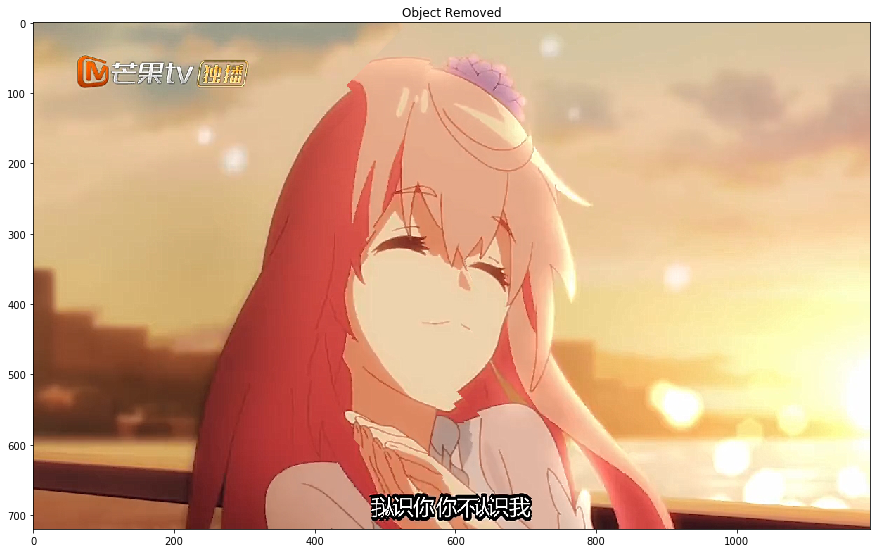

In [15]:
eimg[rr, cc] -= 1000

plt.figure()
plt.title('Object Removed')
out = transform.seam_carve(img, eimg, 'vertical', 90)
resized = transform.resize(img, out.shape, mode='reflect')
plt.imshow(out)
plt.show()

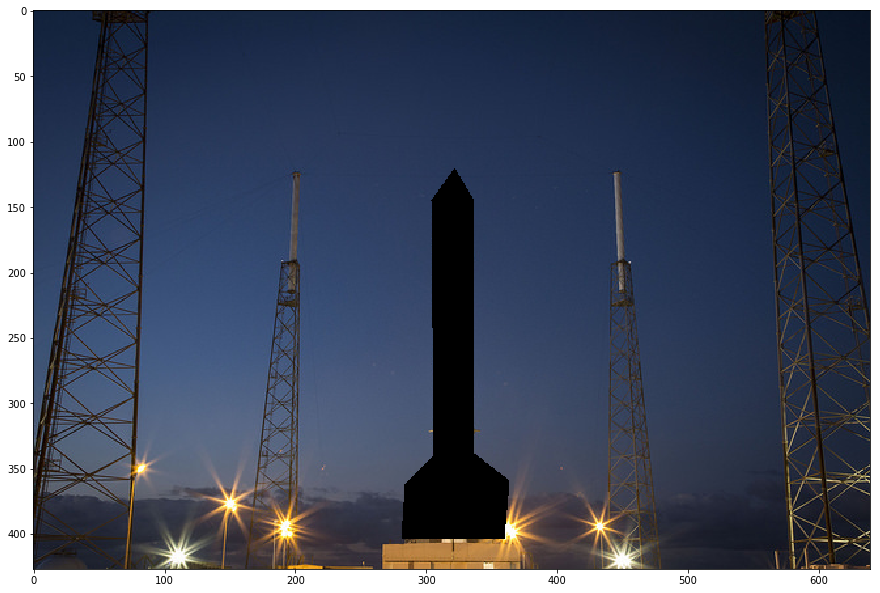

In [27]:
nimg = img.copy()
for i in range(0,len(rr)):
    nimg[rr[i]][cc[i]] = 0
plt.imshow(nimg)
plt.show()